<a href="https://colab.research.google.com/github/farhan1503001/Synthetic-Aperture-Radar-Data-Analysis/blob/main/Pearson_correlation_coefficient_NTL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!pip install rasterio
!pip install shapely
!pip install fiona

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy

In [13]:
import rasterio
from shapely.geometry.polygon import Polygon
from rasterio.mask import mask
from rasterio.plot import reshape_as_image
from PIL import Image

# `LULC vs NTL`

In [14]:
def find_max_color(im,cl):
    counter=[0,0,0,0,0,0]
    for h in range(im.shape[0]):
        for w in range(im.shape[1]):
            if im[h, w, 0] == cl[0][0] and im[h, w, 1] == cl[0][1] and im[h, w, 2] == cl[0][2]:
                counter[0]+=1
            elif im[h, w, 0] == cl[1][0] and im[h, w, 1] == cl[1][1] and im[h, w, 2] == cl[1][2]:
                counter[1]+=1
            elif im[h, w, 0] == cl[2][0] and im[h, w, 1] == cl[2][1] and im[h, w, 2] == cl[2][2]:
                counter[2]+=1
            elif im[h, w, 0] == cl[3][0] and im[h, w, 1] == cl[3][1] and im[h, w, 2] == cl[3][2]:
                counter[3]+=1
            elif im[h, w, 0] == cl[4][0] and im[h, w, 1] == cl[4][1] and im[h, w, 2] == cl[4][2]:
                counter[4]+=1
            
            elif im[h, w, 0] == cl[5][0] and im[h, w, 1] == cl[5][1] and im[h, w, 2] == cl[5][2]:
                counter[5]+=1
            
    max_index=counter.index(max(counter))
    return max_index

In [15]:
cl_values=[[  0,0,0],
 [  0,0,255],
 [  0,255,0],
 [255,255,0],
 [  0,255,255],
 [255,0,0]
 ]

In [16]:
#DPDC
filentl=open('/content/lulc-ntl-1x1-grid.json')
ntl_json=json.load(filentl)
#print(ntl_json)
ntl_power=[]
lulc_label=[]
for i in range(400):
  cell_id=ntl_json['features'][i]['properties']['cell_id']
  ntl_mean=ntl_json['features'][i]['properties']['NTL_mean_2020']
  if ntl_mean is not None:
    cod=ntl_json['features'][i]['geometry']['coordinates'][0]
    coords = cod
    print(coords)
    try:
      copenhagen_poly = Polygon(coords)
      img_1 = rasterio.open('/content/drive/MyDrive/GRID/Roadkmz.tif')
      cropped_img_1, out_transform = mask(img_1, shapes=[copenhagen_poly], crop=True)
      print(cropped_img_1.shape)
      img_1 = reshape_as_image(cropped_img_1)
      print(img_1.shape)
      label=find_max_color(img_1,cl_values)
      ntl_power.append(ntl_mean)
      lulc_label.append(label)
    except:
      print("Out of bounds")
    

[[90.3285015727336, 23.88391489483956], [90.32852041386585, 23.874880723232906], [90.31870686826802, 23.874898779412664], [90.31868754998293, 23.883934286788143], [90.3285015727336, 23.88391489483956]]
(3, 423, 459)
(423, 459, 3)
[[90.32852041386585, 23.874880723232906], [90.3285015727336, 23.88391489483956], [90.33831119186527, 23.88389551159227], [90.33833051987656, 23.874862673381728], [90.32852041386585, 23.874880723232906]]
(3, 423, 459)
(423, 459, 3)
[[90.32852041386585, 23.874880723232906], [90.32853930469855, 23.86582272066299], [90.31872618488084, 23.86586405419167], [90.31870686826802, 23.874898779412664], [90.32852041386585, 23.874880723232906]]
(3, 424, 459)
(424, 459, 3)
[[90.32853930469855, 23.86582272066299], [90.32852041386585, 23.874880723232906], [90.33833051987656, 23.874862673381728], [90.33834995153224, 23.86578139755069], [90.32853930469855, 23.86582272066299]]
(3, 425, 459)
(425, 459, 3)
[[90.32853930469855, 23.86582272066299], [90.32855814041824, 23.856791144335

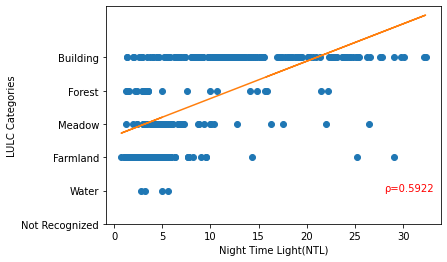

[[1.         0.59226787]
 [0.59226787 1.        ]]


In [17]:
x=np.array(ntl_power)
y=np.array(lulc_label)
import matplotlib.pyplot as plt
corref_matrix=np.corrcoef(x,y)

#create basic scatterplot
plt.plot(x, y, 'o')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)

#add linear regression line to scatterplot 
plt.plot(x, m*x+b)
plt.xlabel("Night Time Light(NTL)")
plt.ylabel("LULC Categories")
plt.yticks(ticks=[0,1,2,3,4,5],labels=["Not Recognized",'Water','Farmland','Meadow','Forest','Building'])
plt.figtext(0.77,0.24,'ρ=0.5922',color='red')
plt.show()
print(corref_matrix)

# Road Classification vs Mean NTL

In [ ]:
def find_max_color(im,cl):
    counter=[0,0,0,0,0,0]
    for h in range(im.shape[0]):
        for w in range(im.shape[1]):
            if im[h, w, 0] == cl[0][0] and im[h, w, 1] == cl[0][1] and im[h, w, 2] == cl[0][2]:
                counter[0]+=1
            elif im[h, w, 0] == cl[1][0] and im[h, w, 1] == cl[1][1] and im[h, w, 2] == cl[1][2]:
                counter[1]+=1
            elif im[h, w, 0] == cl[2][0] and im[h, w, 1] == cl[2][1] and im[h, w, 2] == cl[2][2]:
                counter[2]+=1
            elif im[h, w, 0] == cl[3][0] and im[h, w, 1] == cl[3][1] and im[h, w, 2] == cl[3][2]:
                counter[3]+=1
            """
            elif im[h, w, 0] == cl[4][0] and im[h, w, 1] == cl[4][1] and im[h, w, 2] == cl[4][2]:
                counter[4]+=1
            
            elif im[h, w, 0] == cl[5][0] and im[h, w, 1] == cl[5][1] and im[h, w, 2] == cl[5][2]:
                counter[5]+=1
            """
    max_index=counter.index(max(counter))
    return max_index

In [ ]:
cl_values=[[  0,0,0],
           [255,255,191],
           [171,221,164],
 [ 43,131,186],
 
 ]
filentl=open('/content/lulc-ntl-1x1-grid.json')
ntl_json=json.load(filentl)
#print(ntl_json)
ntl_power=[]
road_label=[]
for i in range(400):
  cell_id=ntl_json['features'][i]['properties']['cell_id']
  ntl_mean=ntl_json['features'][i]['properties']['NTL_mean_2020']
  if ntl_mean is not None:
    cod=ntl_json['features'][i]['geometry']['coordinates'][0]
    coords = cod
    copenhagen_poly = Polygon(coords)
    try:
      img_1 = rasterio.open('/content/drive/MyDrive/Corrected Grid and Rule/Road Classification/Grid/Roadraster.tif')
      cropped_img_1, out_transform = mask(img_1, shapes=[copenhagen_poly], crop=True)
      print(cropped_img_1.shape)
      img_1 = reshape_as_image(cropped_img_1)
      #print(img_1.shape)
      img_1 = Image.fromarray(img_1)
      image=img_1.convert('RGB')
      image=np.array(image)
      print(image.shape)
      label=find_max_color(image,cl_values)
      print(label)
      ntl_power.append(ntl_mean)
      road_label.append(label)
    except:
      print("Out of bounds")


(4, 425, 407)
(425, 407, 3)
3
(4, 424, 407)
(424, 407, 3)
3
(4, 425, 407)
(425, 407, 3)
2
(4, 426, 407)
(426, 407, 3)
2
(4, 426, 407)
(426, 407, 3)
3
(4, 426, 407)
(426, 407, 3)
3
(4, 426, 408)
(426, 408, 3)
3
(4, 426, 407)
(426, 407, 3)
3
(4, 422, 407)
(422, 407, 3)
3
(4, 421, 407)
(421, 407, 3)
3
(4, 424, 407)
(424, 407, 3)
3
(4, 424, 408)
(424, 408, 3)
3
(4, 425, 407)
(425, 407, 3)
3
(4, 425, 407)
(425, 407, 3)
3
(4, 425, 407)
(425, 407, 3)
3
(4, 425, 407)
(425, 407, 3)
3
(4, 425, 408)
(425, 408, 3)
3
(4, 425, 407)
(425, 407, 3)
3
(4, 425, 407)
(425, 407, 3)
3
(4, 425, 407)
(425, 407, 3)
3
(4, 426, 407)
(426, 407, 3)
3
(4, 426, 408)
(426, 408, 3)
3
(4, 422, 407)
(422, 407, 3)
3
(4, 422, 407)
(422, 407, 3)
3
(4, 426, 407)
(426, 407, 3)
3
(4, 426, 407)
(426, 407, 3)
0
(4, 424, 407)
(424, 407, 3)
3
(4, 423, 407)
(423, 407, 3)
0
(4, 425, 407)
(425, 407, 3)
2
(4, 425, 408)
(425, 408, 3)
0
(4, 425, 407)
(425, 407, 3)
2
(4, 426, 408)
(426, 408, 3)
3
(4, 422, 407)
(422, 407, 3)
2
(4, 422, 4

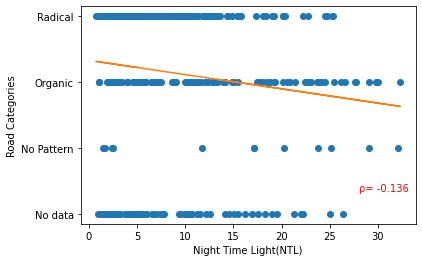

[[ 1.         -0.13572147]
 [-0.13572147  1.        ]]


In [ ]:
x=np.array(ntl_power)
y=np.array(road_label)
import matplotlib.pyplot as plt
corref_matrix=np.corrcoef(x,y)

#create basic scatterplot
plt.plot(x, y, 'o')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)

#add linear regression line to scatterplot 
plt.plot(x, m*x+b)
plt.xlabel("Night Time Light(NTL)")
plt.ylabel("Road Categories")
plt.yticks(ticks=[0,1,2,3],labels=["No data",'No Pattern','Organic','Radical'])
plt.figtext(0.77,0.24,'ρ= -0.136 ',color='red')
plt.show()
print(corref_matrix)

# Building Categorization vs NTL

In [ ]:
def find_max_color(im,cl):
    counter=[0,0,0,0,0,0]
    for h in range(im.shape[0]):
        for w in range(im.shape[1]):
            if im[h, w, 0] == cl[0][0] and im[h, w, 1] == cl[0][1] and im[h, w, 2] == cl[0][2]:
                counter[0]+=1
            elif im[h, w, 0] == cl[1][0] and im[h, w, 1] == cl[1][1] and im[h, w, 2] == cl[1][2]:
                counter[1]+=1
            elif im[h, w, 0] == cl[2][0] and im[h, w, 1] == cl[2][1] and im[h, w, 2] == cl[2][2]:
                counter[2]+=1
            elif im[h, w, 0] == cl[3][0] and im[h, w, 1] == cl[3][1] and im[h, w, 2] == cl[3][2]:
                counter[3]+=1
            
            elif im[h, w, 0] == cl[4][0] and im[h, w, 1] == cl[4][1] and im[h, w, 2] == cl[4][2]:
                counter[4]+=1
            """
            elif im[h, w, 0] == cl[5][0] and im[h, w, 1] == cl[5][1] and im[h, w, 2] == cl[5][2]:
                counter[5]+=1
            """
    max_index=counter.index(max(counter))
    return max_index

In [ ]:
cl_values=[[  0,0,0],   #Black
           [253,3,3], #Red
           [255,227,19],#Yellow
           [ 21,194,180], #Cyan
           [ 17,35,237]   #Blue
           ]

filentl=open('/content/lulc-ntl-1x1-grid.json')
ntl_json=json.load(filentl)
#print(ntl_json)
ntl_power=[]
building_label=[]
for i in range(400):
  cell_id=ntl_json['features'][i]['properties']['cell_id']
  ntl_mean=ntl_json['features'][i]['properties']['NTL_mean_2020']
  if ntl_mean is not None:
    cod=ntl_json['features'][i]['geometry']['coordinates'][0]
    coords = cod
    copenhagen_poly = Polygon(coords)

    img_1 = rasterio.open('/content/drive/MyDrive/Corrected Grid and Rule/Building classification/Grid/Building Categorization espg.tif')
    try:
      cropped_img_1, out_transform = mask(img_1, shapes=[copenhagen_poly], crop=True)
      print(cropped_img_1.shape)
      img_1 = reshape_as_image(cropped_img_1)
      #print(img_1.shape)
      img_1 = Image.fromarray(img_1)
      image=img_1.convert('RGB')
      image=np.array(image)
      print(image.shape)
      label=find_max_color(image,cl_values)
      print(label)
      ntl_power.append(ntl_mean)
      building_label.append(label)
    except:
      print("Out of bounds")


(4, 441, 479)
(441, 479, 3)
0
(4, 441, 480)
(441, 480, 3)
1
(4, 442, 479)
(442, 479, 3)
0
(4, 444, 480)
(444, 480, 3)
0
(4, 443, 479)
(443, 479, 3)
0
(4, 443, 480)
(443, 480, 3)
0
(4, 443, 479)
(443, 479, 3)
0
(4, 443, 480)
(443, 480, 3)
0
(4, 439, 479)
(439, 479, 3)
0
(4, 438, 480)
(438, 480, 3)
0
(4, 442, 480)
(442, 480, 3)
0
(4, 441, 480)
(441, 480, 3)
0
(4, 442, 480)
(442, 480, 3)
0
(4, 442, 480)
(442, 480, 3)
0
(4, 442, 480)
(442, 480, 3)
0
(4, 443, 479)
(443, 479, 3)
0
(4, 442, 480)
(442, 480, 3)
0
(4, 442, 479)
(442, 479, 3)
0
(4, 442, 480)
(442, 480, 3)
0
(4, 442, 479)
(442, 479, 3)
1
(4, 443, 480)
(443, 480, 3)
0
(4, 443, 479)
(443, 479, 3)
1
(4, 440, 479)
(440, 479, 3)
0
(4, 440, 479)
(440, 479, 3)
0
(4, 443, 479)
(443, 479, 3)
0
(4, 443, 480)
(443, 480, 3)
0
(4, 440, 479)
(440, 479, 3)
0
(4, 440, 480)
(440, 480, 3)
0
(4, 443, 479)
(443, 479, 3)
0
(4, 443, 480)
(443, 480, 3)
0
(4, 443, 479)
(443, 479, 3)
0
(4, 442, 480)
(442, 480, 3)
0
(4, 439, 479)
(439, 479, 3)
0
(4, 439, 4

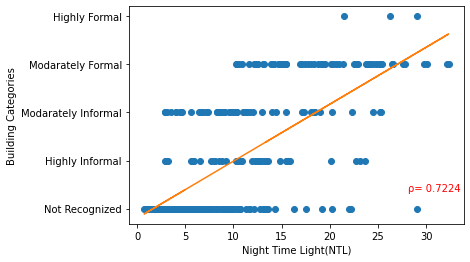

[[1.        0.7224714]
 [0.7224714 1.       ]]


In [ ]:
x=np.array(ntl_power)
y=np.array(building_label)
import matplotlib.pyplot as plt
corref_matrix=np.corrcoef(x,y)

#create basic scatterplot
plt.plot(x, y, 'o')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)

#add linear regression line to scatterplot 
plt.plot(x, m*x+b)
plt.xlabel("Night Time Light(NTL)")
plt.ylabel("Building Categories")
plt.yticks(ticks=[0,1,2,3,4],labels=["Not Recognized",'Highly Informal','Modarately Informal','Modarately Formal','Highly Formal'])
plt.figtext(0.77,0.24,'ρ= 0.7224 ',color='red')
plt.show()
print(corref_matrix)